In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/soal3.csv')
df.columns = [i.lower() for i in df.columns]
df.head()

,transaction_id,user_id,location_id,transaction_type,amount_idr,transaction_time,status,device_type
0,T1,U101,L1,Deposit,50000,2024-09-01 10:00:00,Success,Mobile
1,T2,U102,L2,Withdrawal,10000,2024-09-01 10:05:00,Success,Web
2,T3,U103,L3,Deposit,150000,2024-09-01 10:10:00,Success,Mobile
3,T4,U104,L1,Fee,5000,2024-09-01 10:15:00,Success,Mobile
4,T5,U105,L4,Deposit,25000,2024-09-01 10:20:00,Success,Web


In [3]:
set(df['device_type'])

{'Mobile', 'Web'}

In [4]:
set(df['status'])

{'Failed', 'Pending', 'Success'}

In [5]:
success = df[df['status'] == 'Success']
success

,transaction_id,user_id,location_id,transaction_type,amount_idr,transaction_time,status,device_type
0,T1,U101,L1,Deposit,50000,2024-09-01 10:00:00,Success,Mobile
1,T2,U102,L2,Withdrawal,10000,2024-09-01 10:05:00,Success,Web
2,T3,U103,L3,Deposit,150000,2024-09-01 10:10:00,Success,Mobile
3,T4,U104,L1,Fee,5000,2024-09-01 10:15:00,Success,Mobile
4,T5,U105,L4,Deposit,25000,2024-09-01 10:20:00,Success,Web
...,...,...,...,...,...,...,...,...
94,T95,U186,L1,Deposit,150000,2024-09-29 15:00:00,Success,Mobile
96,T97,U188,L3,Deposit,300000,2024-09-29 15:10:00,Success,Mobile
97,T98,U189,L4,Deposit,10000,2024-09-29 15:15:00,Success,Mobile
98,T99,U190,L5,Fee,12000,2024-09-30 16:00:00,Success,Web


In [6]:
print(success.groupby('device_type').count()[['transaction_id']])

             transaction_id
device_type                
Mobile                   59
Web                      31


In [7]:
print(success.groupby('device_type').sum('amount_idr'))

             amount_idr
device_type            
Mobile          7947500
Web             4657000


1. Based on two metrics (transaction count & sum amount) mobile has more transaction than web
2. Customer prefer to use mobile device to do transaction

In [8]:
print(success.groupby(['device_type', 'transaction_type']).count()[['transaction_id']])

                              transaction_id
device_type transaction_type                
Mobile      Deposit                       32
            Fee                           13
            Withdrawal                    14
Web         Deposit                       17
            Fee                            5
            Withdrawal                     9


1. Mobile apps charge more fees from customer than web apps

In [9]:
success.groupby(['device_type', 'location_id']).count()[['transaction_id']]


transaction_id
device_type location_id                
Mobile      L1                       16
            L2                        8
            L3                       12
            L4                        9
            L5                       14
Web         L1                        7
            L2                        7
            L3                        5
            L4                        8
            L5                        4

1. Location L1 have higher transaction

In [10]:
df['amount_idr'].dtype

dtype('int64')

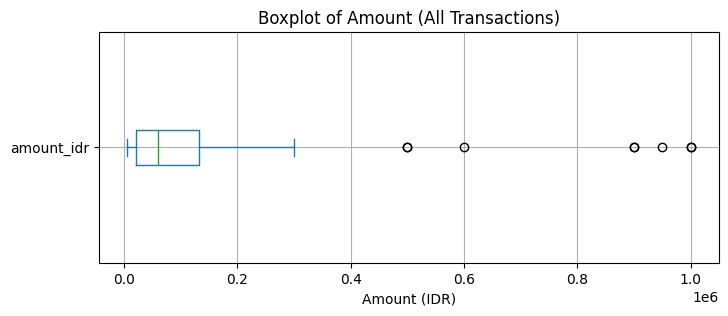

In [11]:
import matplotlib.pyplot as plt

df['amount_idr'].plot.box(vert=False, figsize=(8,3), grid=True)

plt.title("Boxplot of Amount (All Transactions)")
plt.xlabel("Amount (IDR)")
plt.savefig("images/boxplot_all.png", bbox_inches='tight', dpi=300)
plt.show()

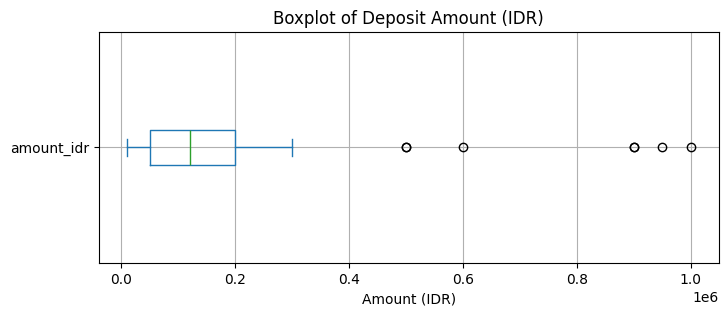

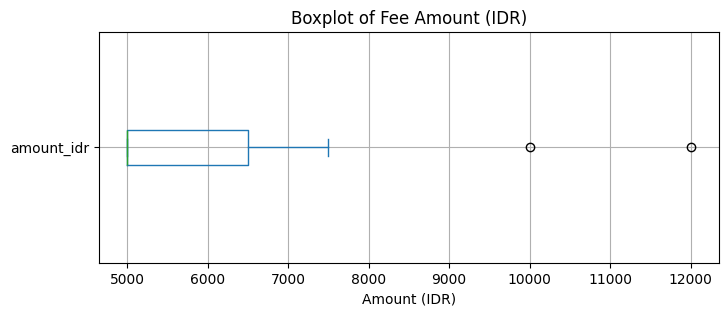

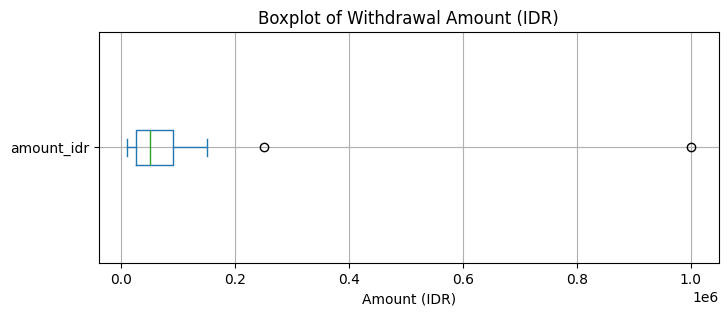

In [12]:
import matplotlib.pyplot as plt

deposit = df[df['transaction_type'] == 'Deposit']
fee = df[df['transaction_type'] == 'Fee']
withdrawal = df[df['transaction_type'] == 'Withdrawal']  

deposit['amount_idr'].plot.box(vert=False, figsize=(8,3), grid=True)
plt.title("Boxplot of Deposit Amount (IDR)")
plt.xlabel("Amount (IDR)")
plt.savefig("images/boxplot_deposit.png", bbox_inches='tight', dpi=300)
plt.show()

fee['amount_idr'].plot.box(vert=False, figsize=(8,3), grid=True)
plt.title("Boxplot of Fee Amount (IDR)")
plt.xlabel("Amount (IDR)")
plt.savefig("images/boxplot_fee.png", bbox_inches='tight', dpi=300)
plt.show()

withdrawal['amount_idr'].plot.box(vert=False, figsize=(8,3), grid=True)
plt.title("Boxplot of Withdrawal Amount (IDR)")
plt.xlabel("Amount (IDR)")
plt.savefig("images/boxplot_withdrawal.png", bbox_inches='tight', dpi=300)
plt.show()

In [13]:
q1 = df['amount_idr'].quantile(0.25)
q3 = df['amount_idr'].quantile(0.75)
iqr = q3 - q1

In [14]:
batas_bawah = q1 - 1.5 * iqr
batas_atas  = q3 + 1.5 * iqr

outliers = df[(df['amount_idr'] < batas_bawah) | (df['amount_idr'] > batas_atas)]

print("(outliers)")
outliers[['transaction_id','amount_idr']]

(outliers)


,transaction_id,amount_idr
43,T44,1000000
50,T51,500000
54,T55,1000000
61,T62,900000
76,T77,950000
83,T84,600000
92,T93,900000
99,T100,500000


In [15]:
set(df['transaction_type'])

{'Deposit', 'Fee', 'Withdrawal'}

In [16]:
deposit = df[df['transaction_type'] == 'Deposit']
fee = df[df['transaction_type'] == 'Fee']
withdrawal = df[df['transaction_type'] == 'Withdrawal']

In [17]:
def get_outlier(dataframe):
    q1 = dataframe['amount_idr'].quantile(0.25)
    q3 = dataframe['amount_idr'].quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas  = q3 + 1.5 * iqr

    outliers = dataframe[(dataframe['amount_idr'] < batas_bawah) | (dataframe['amount_idr'] > batas_atas)]

    print("(outliers)")
    return outliers[['transaction_id','amount_idr']]


In [18]:
out_deposit = get_outlier(deposit)
out_fee = get_outlier(fee)
out_withdrawal = get_outlier(withdrawal)

set_deposit = set(out_deposit['transaction_id'])
set_fee = set(out_fee['transaction_id'])
set_withdrawal = set(out_withdrawal['transaction_id'])

out_per_type = pd.concat([out_deposit, out_fee, out_withdrawal], ignore_index=True)
out_per_type

(outliers)
(outliers)
(outliers)


,transaction_id,amount_idr
0,T51,500000
1,T55,1000000
2,T62,900000
3,T77,950000
4,T84,600000
5,T93,900000
6,T100,500000
7,T54,10000
8,T99,12000
9,T44,1000000


In [19]:
df['is_anomaly'] = df['transaction_id'].apply(
    lambda x: True if x in set(out_per_type['transaction_id']) else False
)

In [20]:
df[df['is_anomaly']]

,transaction_id,user_id,location_id,transaction_type,amount_idr,transaction_time,status,device_type,is_anomaly
43,T44,U140,L3,Withdrawal,1000000,2024-09-14 23:00:00,Success,Mobile,True
50,T51,U146,L1,Deposit,500000,2024-09-16 09:00:00,Success,Mobile,True
53,T54,U149,L4,Fee,10000,2024-09-16 09:15:00,Success,Mobile,True
54,T55,U150,L5,Deposit,1000000,2024-09-17 10:00:00,Success,Web,True
61,T62,U156,L4,Deposit,900000,2024-09-18 11:15:00,Success,Web,True
76,T77,U169,L3,Deposit,950000,2024-09-23 09:10:00,Success,Mobile,True
79,T80,U172,L1,Withdrawal,250000,2024-09-24 10:05:00,Success,Web,True
83,T84,U175,L5,Deposit,600000,2024-09-25 11:05:00,Success,Mobile,True
92,T93,U184,L4,Deposit,900000,2024-09-28 14:05:00,Success,Web,True
98,T99,U190,L5,Fee,12000,2024-09-30 16:00:00,Success,Web,True


1. Identified as an outlier based on per-transaction-type analysis.
2. Each value significantly deviates from the normal range for its transaction type (Deposit, Withdrawal, Fee), indicating unusual activity compared to typical small-value transactions.